<a href="https://www.kaggle.com/code/mohamedmaher5/plantvillage-recognizer?scriptVersionId=164450269" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Path to the directory containing the class folders
dir_path = "/kaggle/input/plantvillage-dataset/color"

In [2]:
import os

# Get the names of the folders inside the directory
classes = [folder for folder in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, folder))]

# Print the folder names
for clss in classes:
    print(clss)

Tomato___Late_blight
Tomato___healthy
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Soybean___healthy
Squash___Powdery_mildew
Potato___healthy
Corn_(maize)___Northern_Leaf_Blight
Tomato___Early_blight
Tomato___Septoria_leaf_spot
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Strawberry___Leaf_scorch
Peach___healthy
Apple___Apple_scab
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Bacterial_spot
Apple___Black_rot
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Peach___Bacterial_spot
Apple___Cedar_apple_rust
Tomato___Target_Spot
Pepper,_bell___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Potato___Late_blight
Tomato___Tomato_mosaic_virus
Strawberry___healthy
Apple___healthy
Grape___Black_rot
Potato___Early_blight
Cherry_(including_sour)___healthy
Corn_(maize)___Common_rust_
Grape___Esca_(Black_Measles)
Raspberry___healthy
Tomato___Leaf_Mold
Tomato___Spider_mites Two-spotted_spider_mite
Pepper,_bell___Bacterial_spot
Corn_(maize)___healthy


In [3]:
input_shape = (150,150,3)

In [4]:
import numpy as np

def reshape_image(image):
    reshaped_image = np.resize(image, input_shape)
    return reshaped_image

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with preprocessing function
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    preprocessing_function=reshape_image
)

2024-02-26 22:24:13.843354: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 22:24:13.843500: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 22:24:13.969275: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
batch_size = 256

In [7]:
train_generator = train_datagen.flow_from_directory(
    dir_path,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 43456 images belonging to 38 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    dir_path,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 10849 images belonging to 38 classes.


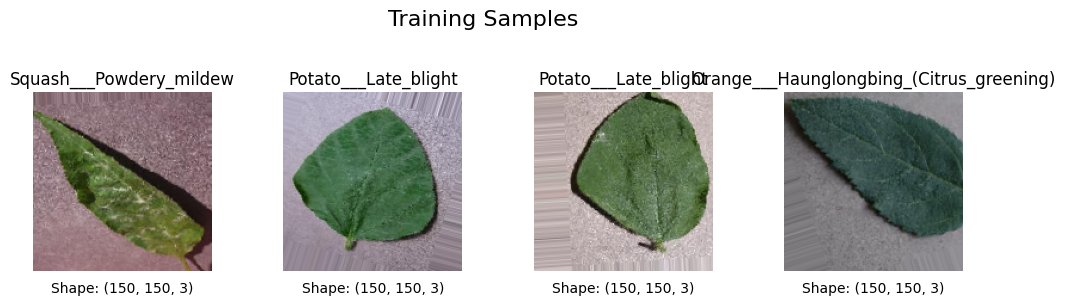

In [9]:
import matplotlib.pyplot as plt

# Get batch of images and labels from the generator
train_images, train_labels = train_generator.next()
# Display the images and labels
plt.figure(figsize=(12, 8))
plt.suptitle('Training Samples', fontsize=16)
plt.subplots_adjust(wspace=0.4, top=1.42) 
for i in range(4):  # Plot the first 5 images
    plt.subplot(1, 4, i + 1)
    plt.imshow(train_images[i])
    plt.title(classes[np.where(train_labels[i] == 1.0)[0][0]])
    plt.axis('off')
    plt.text(0.5, -0.1, f'Shape: {train_images[i].shape}', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

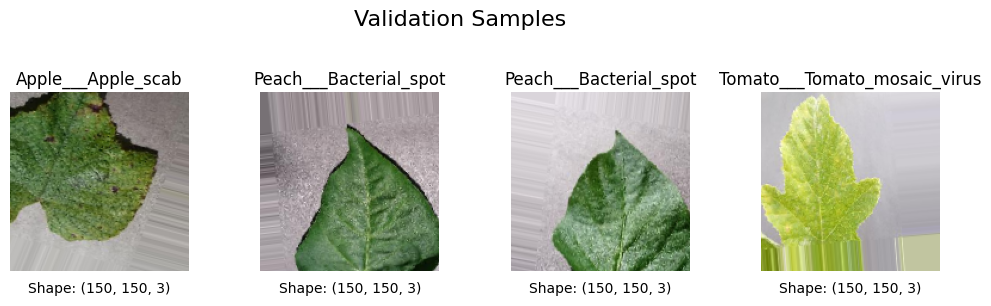

In [10]:
import matplotlib.pyplot as plt

# Get batch of images and labels from the generator
val_images, val_labels = validation_generator.next()
# Display the images and labels

plt.figure(figsize=(12, 8))
plt.suptitle('Validation Samples', fontsize=16)
plt.subplots_adjust(wspace=0.4, top=1.42) 
for i in range(4):  # Plot the first 5 images
    plt.subplot(1, 4, i + 1)
    plt.imshow(val_images[i])
    plt.title(classes[np.where(val_labels[i] == 1.0)[0][0]])
    plt.axis('off')
    plt.text(0.5, -0.1, f'Shape: {val_images[i].shape}', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [11]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained InceptionV3 model without the top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding a custom classification head
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))  # Add additional dense layer if needed
model.add(Dense(38, activation='softmax'))  # Output layer with your desired number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

87910968/87910968 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 38)                19494     
                                                                 
Total params: 22871366 (87.25 MB)
Trainable params: 1068582 (4.08 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

epochs = 5
save_best = ModelCheckpoint('best_weights.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [13]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[save_best],
)

Epoch 1/5


I0000 00:00:1708986360.385526      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


170/170 [==============================] - ETA: 0s - loss: 1.1720 - accuracy: 0.6861
Epoch 1: val_accuracy improved from -inf to 0.80044, saving model to best_weights.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


170/170 [==============================] - 718s 4s/step - loss: 1.1720 - accuracy: 0.6861 - val_loss: 0.6670 - val_accuracy: 0.8004
Epoch 2/5
170/170 [==============================] - ETA: 0s - loss: 0.6015 - accuracy: 0.8155
Epoch 2: val_accuracy improved from 0.80044 to 0.83160, saving model to best_weights.h5
170/170 [==============================] - 372s 2s/step - loss: 0.6015 - accuracy: 0.8155 - val_loss: 0.5477 - val_accuracy: 0.8316
Epoch 3/5
170/170 [==============================] - ETA: 0s - loss: 0.5114 - accuracy: 0.8409
Epoch 3: val_accuracy improved from 0.83160 to 0.84561, saving model to best_weights.h5
170/170 [==============================] - 372s 2s/step - loss: 0.5114 - accuracy: 0.8409 - val_loss: 0.4872 - val_accuracy: 0.8456
Epoch 4/5
170/170 [==============================] - ETA: 0s - loss: 0.4609 - accuracy: 0.8524
Epoch 4: val_accuracy improved from 0.84561 to 0.84653, saving model to best_weights.h5
170/170 [==============================] - 371s 2s/step

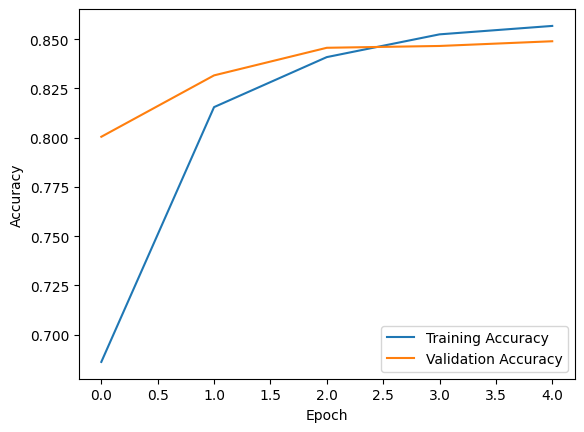

In [14]:
import matplotlib.pyplot as plt

# Plot Accuracy Curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

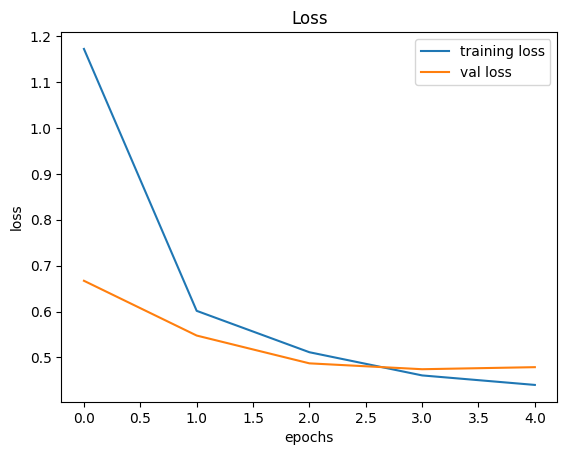

In [15]:
## Plot Loss Curve
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()